In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json
import os

2025-01-09 21:18:33.980917: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-09 21:18:34.988245: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [3]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

2025-01-09 21:18:36.733502: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-09 21:18:36.813285: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-01-09 21:18:36.815271: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.
2025-01-09 21:18:37.207498: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 62720000 exceeds 10%

TensorShape([60000, 28, 28, 1])

In [4]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(pool_size=(2, 2)), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(pool_size=(2,2)), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

/home/ariouich/projet_3D/.conda/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [6]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

2025-01-09 21:18:37.447118: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8794 - loss: 0.4034 - val_accuracy: 0.9744 - val_loss: 0.0833
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9745 - loss: 0.0829 - val_accuracy: 0.9850 - val_loss: 0.0587
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9831 - loss: 0.0541 - val_accuracy: 0.9884 - val_loss: 0.0417
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9869 - loss: 0.0423 - val_accuracy: 0.9922 - val_loss: 0.0295
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9892 - loss: 0.0327 - val_accuracy: 0.9886 - val_loss: 0.0363


In [7]:
lenet_5_model.evaluate(test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9765 - loss: 0.0667


[0.058277539908885956, 0.9804999828338623]

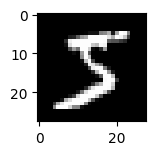

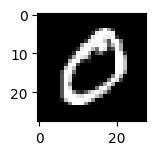

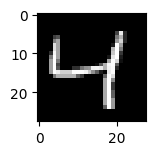

In [8]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [9]:
os.makedirs('model_dir1', exist_ok=True)
lenet_5_model.save('model_dir1/lenet_5_model.keras')
print(os.listdir('model_dir1'))

['lenet_5_model.keras']


In [11]:
lenet_5_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,120 (723.13 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,414 (482.09 KB)

In [12]:
json_model = lenet_5_model.to_json()

In [13]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [14]:
lenet_5_model.save_weights('FashionMNIST_model.weights.h5')

In [16]:
import h5py
import numpy as np
import os






# Charger les poids
from tensorflow.keras.models import load_model

# Charger le modèle
model = load_model("./model_dir1/lenet_5_model.keras")

# Dossier pour sauvegarder les poids
output_dir = "weights"
os.makedirs(output_dir, exist_ok=True)

# Sauvegarder les poids et biais de chaque couche
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()  # Récupérer poids et biais
    if weights:  # Si la couche contient des poids
        np.array(weights[0]).tofile(f"{output_dir}/layer_{i}_weights.bin")  # Poids
        if len(weights) > 1:
            np.array(weights[1]).tofile(f"{output_dir}/layer_{i}_bias.bin")  # Biais
        print(f"Layer {i}: Weights and biases saved")


Layer 0: Weights and biases saved
Layer 2: Weights and biases saved
Layer 5: Weights and biases saved
Layer 6: Weights and biases saved
Layer 7: Weights and biases saved


In [17]:
from tensorflow.keras.datasets import mnist
# Charger les données MNIST
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# Normaliser les valeurs des pixels entre 0 et 1
train_x = train_x / 255.0

# Sélectionner une image du jeu d'entraînement (par exemple, la première image)
image = train_x[4]  # Modifier l'indice pour une autre image

# Vérifier la taille de l'image (28x28 pour MNIST)
print("Image shape:", image.shape)

# Sauvegarder l'image en format binaire
image.flatten().astype(np.float32).tofile("mnist_image4.bin")
print("Image sauvegardée en mnist_image.bin")


Image shape: (28, 28)
Image sauvegardée en mnist_image.bin


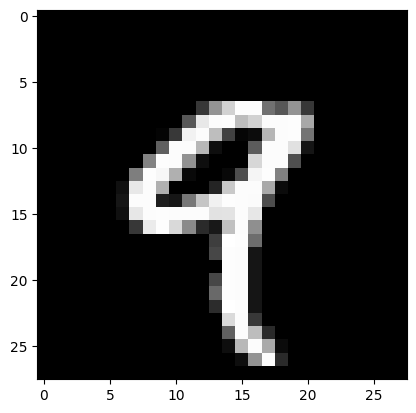

In [18]:
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray')

In [19]:
# print les poids de la première couche
print(model.layers[0].get_weights()[0][0][0])
print(model.layers[0].get_weights()[1])


[[-0.23108378 -0.00459954 -0.17093359 -0.34644854 -0.35427794  0.38658893]]
[-0.06776379  0.03646385  0.05696914  0.08924106 -0.0597977   0.04832286]


In [20]:
print(model.layers[0].get_weights()[0][:, :, 0, 1])

[[-0.00459954  0.20691164  0.13364819  0.23574677  0.09683716]
 [-0.03844523 -0.07173464 -0.11940443 -0.16736606 -0.10699347]
 [ 0.06590606  0.05095291 -0.30662048 -0.34724393 -0.17657441]
 [ 0.10485741  0.11678524 -0.07646127 -0.27271277 -0.0987111 ]
 [ 0.22420295 -0.06772492 -0.00276363 -0.00987455  0.2856786 ]]


In [23]:
import os
import numpy as np
from tensorflow.keras.models import load_model

# Charger le modèle
model = load_model("./model_dir1/lenet_5_model.keras")

# Dossier pour sauvegarder les poids
output_dir = "weights1"
os.makedirs(output_dir, exist_ok=True)

# Sauvegarder les poids et biais de chaque couche
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()  # Récupérer les poids et biais
    if weights:  # Si la couche contient des poids
        # Réorganiser les poids pour suivre l'ordre spécifié
        weights_array = np.array(weights[0])  # Poids
        print(f"Layer {i} weights shape: {weights_array.shape}")  # Debug print
        
        # Adjust the transposition based on the actual shape
        if len(weights_array.shape) == 4:
            reshaped_weights = np.transpose(weights_array, (2, 3, 0, 1))  # Réordonner pour (in_channel, out_channel, height, width)
        else:
            reshaped_weights = weights_array  # No transposition needed for non-4D weights
        
        reshaped_weights.tofile(f"{output_dir}/layer_{i}_weights.bin")  # Sauvegarder les poids dans un fichier
        
        # Sauvegarder les biais s'ils existent
        if len(weights) > 1:
            np.array(weights[1]).tofile(f"{output_dir}/layer_{i}_bias.bin")  # Sauvegarder les biais
        
        print(f"Layer {i}: Weights and biases saved")

Layer 0 weights shape: (5, 5, 1, 6)
Layer 0: Weights and biases saved
Layer 2 weights shape: (5, 5, 6, 16)
Layer 2: Weights and biases saved
Layer 5 weights shape: (400, 120)
Layer 5: Weights and biases saved
Layer 6 weights shape: (120, 84)
Layer 6: Weights and biases saved
Layer 7 weights shape: (84, 10)
Layer 7: Weights and biases saved
